# 주요 질병 사망자 및 보건 환경 비교 분석  
(Comparative Analysis of Major Disease Deaths and Health Environment)
## 1. 소개
국가별 의료 관련 데이터들을 이용해, 국가별, 연간 질병 사망자 수와 의료 인프라 간의 관계를 분석해보고 시각화를 해본 프로젝트

## 2. 목표
- 각 데이터의 EDA와 시각화
- 비슷한 분류의 데이터를 하나로 합치기
- 의료 인프라와 질병 사망자 수 관계 찾기 및 분석

## 3. 데이터 셋
- [KOSIS 10만명당 주요사망원인별 사망률](https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_2KAAC13&vw_cd=MT_RTITLE&list_id=101_003_E&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_RTITLE)
- [KOSIS 의료종사자수](https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_2KAAC13&vw_cd=MT_RTITLE&list_id=101_003_E&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_RTITLE)
- [KOSIS 보건관련 지출비](https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_2KAAC13&vw_cd=MT_RTITLE&list_id=101_003_E&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_RTITLE)
- [KOSIS 보건서비스 지출비](https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_2KAAC13&vw_cd=MT_RTITLE&list_id=101_003_E&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_RTITLE)
- [KOSIS 의약품 판매](https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_2KAAC13&vw_cd=MT_RTITLE&list_id=101_003_E&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_RTITLE)
- [KOSIS 의약품 소비](https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_2KAAC13&vw_cd=MT_RTITLE&list_id=101_003_E&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_RTITLE)
- [KOSIS 공공사회복지 지출](https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_2KAAC13&vw_cd=MT_RTITLE&list_id=101_003_E&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_RTITLE)

## 4. 구현

#### 라이브러리

In [5]:
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import folium

#### 한글 폰트 설정

In [4]:
from IPython.display import set_matplotlib_formats

def get_font_family():
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

get_font_family()

plt.style.use("ggplot")

font_family = get_font_family()
plt.rc("font", family=font_family)
plt.rc("axes", unicode_minus=False)

set_matplotlib_formats("retina")

C:\Users\spec3\AppData\Local\Temp/ipykernel_26448/2328754805.py:32: DeprecationWarning:

`set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`



In [78]:
# 모든 데이터 공통 국가
country_intersection = ['룩셈부르크',  '네덜란드',  '영국',  '이탈리아',  '캐나다',  '오스트레일리아',  '한국',  '일본',  '스페인',  '헝가리',  '독일',  '에스토니아',  '그리스',  '슬로바키아',  '핀란드',  '벨기에',  '체코',  '슬로베니아',  '프랑스',  '스웨덴',  '노르웨이',  '뉴질랜드',  '라트비아',  '덴마크',  '오스트리아',  '포르투갈',  '아일랜드',  '아이슬란드']

### 1. 주요 사망 원인별 사망률

### 2. 의료 종사자 수

#### Data Load

In [6]:
glob.glob("data/*")

['data\\의료종사자수.csv']

In [73]:
# Number of medical workers
df_Nmw = pd.read_csv("data/의료종사자수.csv", encoding="cp949")
df_Nmw.shape

(5820, 4)

In [28]:
df_Nmw.sample(5)

,국가별,시점,항목,데이터
2188,체코,2014,치과의사,7906.0
1690,유럽,2017,간호사,NaN
3680,리투아니아,2008,치과의사,2206.0
2738,프랑스,2018,의사,210567.0
1008,캐나다,2006,의사,67886.0


#### 전처리 및 초기 분석

##### 기본 정보 확인

In [29]:
df_Nmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5820 entries, 0 to 5819
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   국가별     5820 non-null   object 
 1   시점      5820 non-null   int64  
 2   항목      5820 non-null   object 
 3   데이터     4900 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 182.0+ KB


4개의 컬럼을 가지고 있습니다.  
`국가별`은 `국가`로, `시점`은 `연도` / 타입은 `uint16`, `항목`은 `직업`으로, `데이터`는 `수`로 변경해줍니다.

In [74]:
col = ["국가", "연도", "직업", "수"]
df_Nmw.columns = col
df_Nmw["연도"] = df_Nmw["연도"].astype("uint16").copy()

In [60]:
df_Nmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5820 entries, 0 to 5819
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   국가      5820 non-null   object 
 1   연도      5820 non-null   uint16 
 2   직업      5820 non-null   object 
 3   수       4900 non-null   float64
dtypes: float64(1), object(2), uint16(1)
memory usage: 147.9+ KB


##### 결측치

In [61]:
df_Nmw.isnull().sum()

국가      0
연도      0
직업      0
수     920
dtype: int64

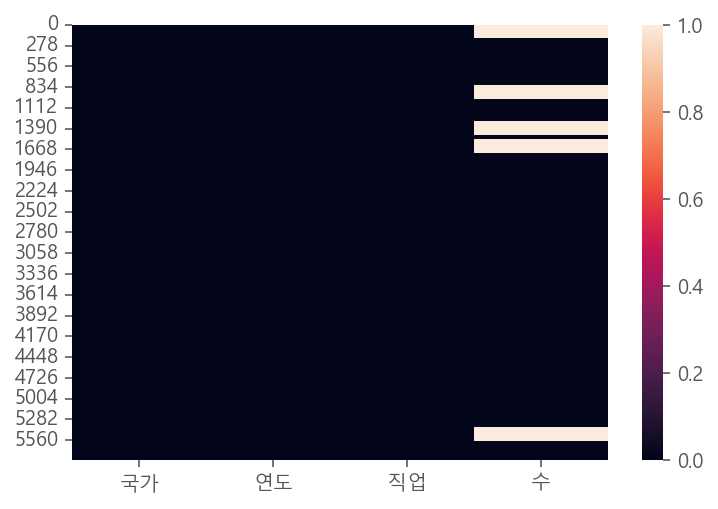

In [62]:
_ = sns.heatmap(data=df_Nmw.isnull())

##### 중복값

In [86]:
df_Nmw.duplicated().sum()

0

##### 필요없는 데이터 버리기
직업에서 천명당 의사/약사/치과의사 등은 필요없기때문에, 해당 행은 버려줍니다.

In [76]:
df_Nmw = df_Nmw[~df_Nmw["직업"].str.contains("천명당")].copy()
df_Nmw.shape

(2910, 4)

사용하는 데이터에서 다음과 같은 국가들만 공통으로 들어있기 때문에,  
모든 데이터를 합쳐 분석하기 위해 공통 국가들만 있는 데이터를 새롭게 생성합니다.

In [82]:
df_Nmw_inter = df_Nmw[df_Nmw["국가"].isin(country_intersection)]
df_Nmw_inter.shape

(1829, 4)

#### EDA 및 시각화
#### 1. 기존 데이터셋 (df_Nmw)

##### 기초 기술 통계

In [87]:
# 수치 데이터 기술 통계 (describe)
df_Nmw.describe()

,연도,수
count,2910.000000,2.450000e+03
mean,2009.003436,1.535792e+05
std,6.321945,3.865644e+05
min,1998.000000,1.490000e+02
25%,2004.000000,5.453500e+03
50%,2009.000000,2.525150e+04
75%,2014.000000,9.436650e+04
max,2020.000000,4.445047e+06


1998년부터 2020년까지의 데이터 입니다.

In [88]:
# 범주 데이터 기술 통계
df_Nmw.describe(include="object")

,국가,직업
count,2910,2910
unique,45,4
top,아시아,의사
freq,92,848


##### 분석과 시각화

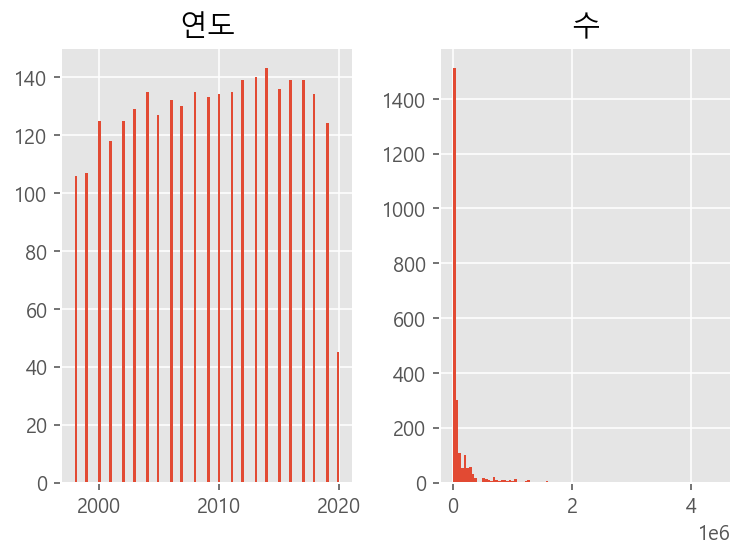

In [90]:
_ = df_Nmw.hist(bins=100)

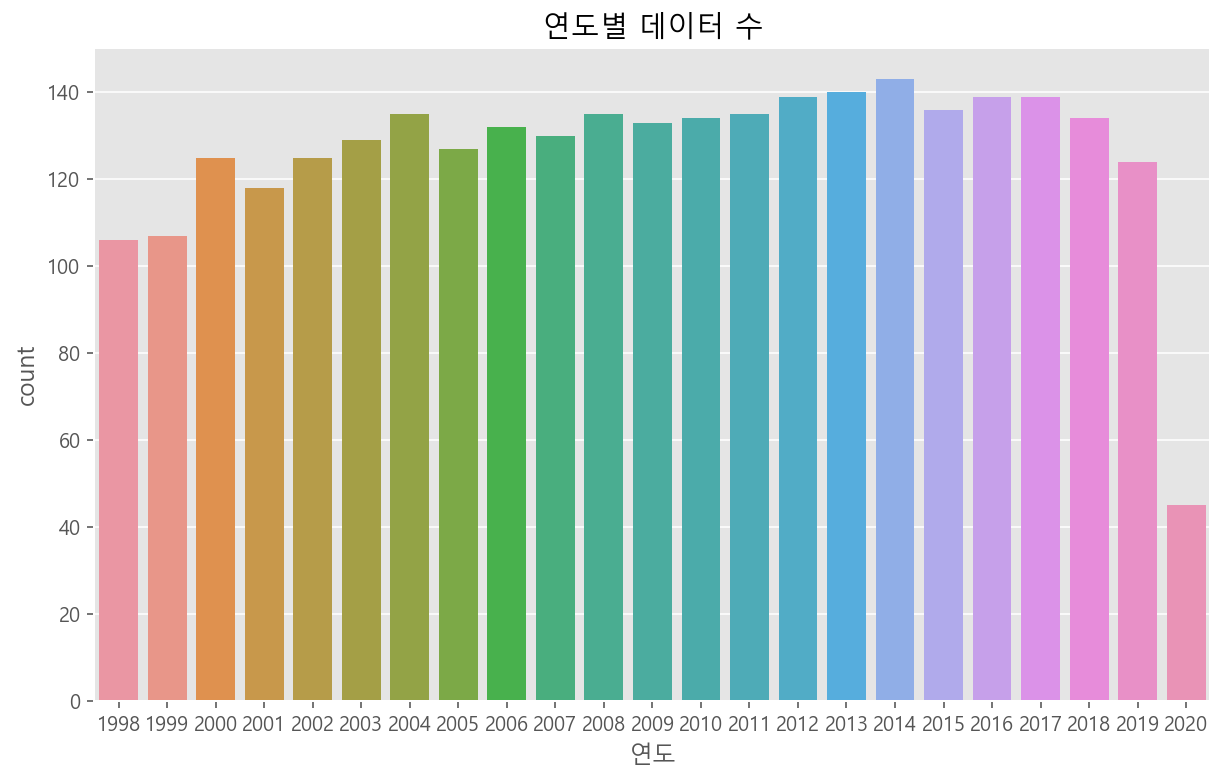

In [126]:
plt.figure(figsize=(10, 6))
_ = sns.countplot(data=df_Nmw, x="연도").set_title("연도별 데이터 수")

2020년도 데이터가 유독적은 것을 확인 할 수 있습니다.  
2021년 9월까지 집계한 데이터인데 원인을 찾아보겠습니다.

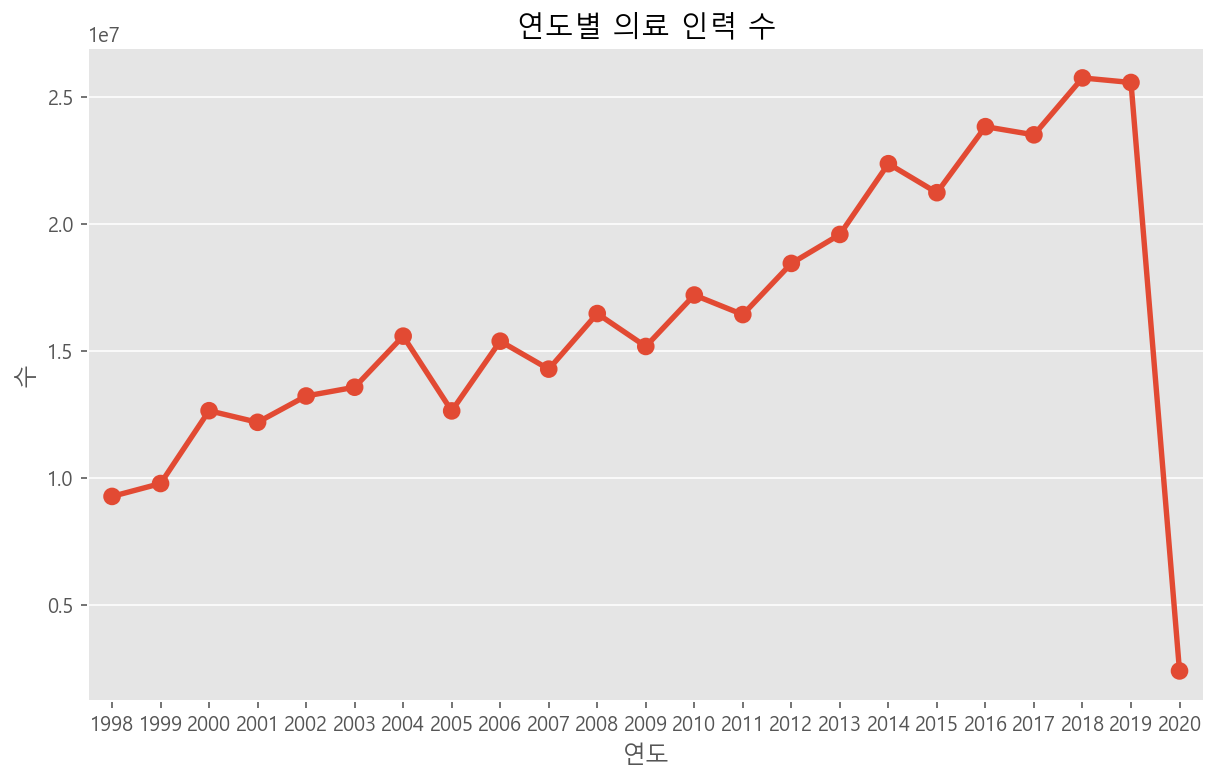

In [106]:
# 연도별 의료 인력 수
plt.figure(figsize=(10, 6))
_ = sns.pointplot(data=df_Nmw, x="연도", y="수", estimator=np.sum, ci=None).set_title("연도별 의료 인력 수")

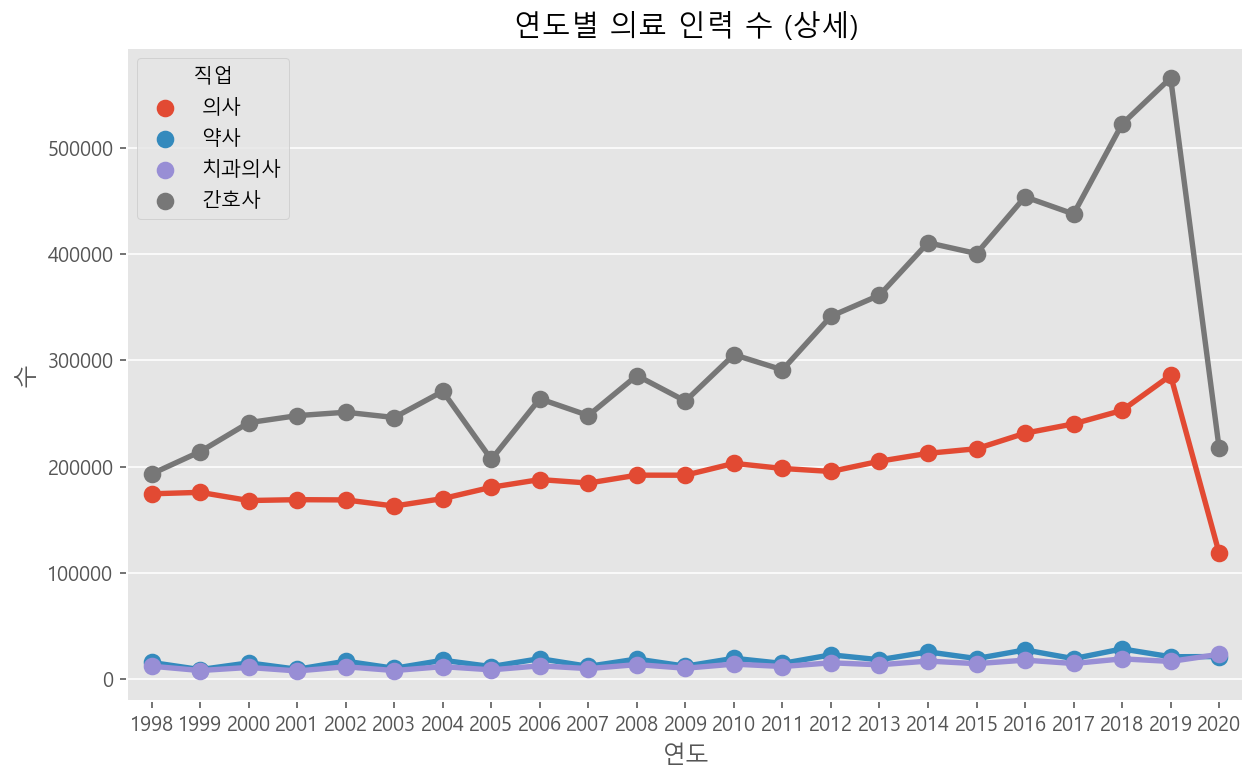

In [107]:
plt.figure(figsize=(10, 6))
_ = sns.pointplot(data=df_Nmw, x="연도", y="수", hue="직업", ci=None).set_title("연도별 의료 인력 수 (상세)")

연도별로 치과의사와 약사의 변동률은 크게 없지만, 2019년에서 2020년 사이의 의사와 간호사의 변동률이 굉장히 큽니다.  
코로나 팬데믹으로 인해, 의료 종사자들이 많이 관뒀다는 기사는 많이 접했지만 변동폭이 너무 커 **연도별 데이터 집계 대상**의 차이가 있을꺼 같다는 생각을 했습니다. 


In [258]:
year_country = pd.crosstab(df_Nmw["연도"], df_Nmw["국가"])
year_country

국가,그리스,남아메리카,남아프리카공화국,네덜란드,노르웨이,뉴질랜드,덴마크,독일,라트비아,러시아,...,일본,중국,체코,캐나다,포르투갈,폴란드,프랑스,핀란드,한국,헝가리
연도,,,,,,,,,,,,,,,,,,,,,
1998,0,4,1,1,2,0,4,3,3,2,...,3,2,4,0,0,4,0,1,3,4
1999,1,4,1,2,2,0,4,3,3,2,...,0,2,4,0,1,4,0,1,3,4
2000,1,4,1,2,2,1,4,4,3,2,...,3,2,4,1,1,4,1,4,3,4
2001,1,4,1,2,2,1,4,4,3,2,...,0,2,4,1,1,4,1,1,3,4
2002,1,4,1,3,4,1,4,4,3,2,...,4,2,4,1,1,4,1,1,3,4
2003,1,4,1,3,4,1,4,4,4,2,...,0,2,4,2,1,4,1,1,3,4
2004,1,4,2,3,4,1,4,4,4,2,...,4,2,4,2,1,4,1,4,4,4
2005,1,4,1,3,4,2,4,4,4,2,...,0,2,4,3,1,4,1,4,4,4
2006,1,4,1,3,4,2,4,4,4,2,...,4,2,4,3,1,4,1,4,4,4


In [259]:
year_country.sum()

국가
그리스         21
남아메리카       92
남아프리카공화국    36
네덜란드        62
노르웨이        84
뉴질랜드        50
덴마크         84
독일          87
라트비아        84
러시아         44
룩셈부르크       78
리투아니아       75
멕시코         66
미국          22
벨기에         81
북아메리카       92
브라질         31
스웨덴         84
스위스         82
스페인         66
슬로바키아       15
슬로베니아       86
아시아         92
아이슬란드       82
아일랜드        11
에스토니아       88
영국          77
오세아니아       92
오스트레일리아     76
오스트리아       90
유럽          92
이스라엘        88
이탈리아        55
인도          41
인도네시아       13
일본          42
중국          44
체코          83
캐나다         61
포르투갈        21
폴란드         79
프랑스         38
핀란드         53
한국          82
헝가리         88
dtype: int64

Text(0.5, 1.0, '국가별 집계 횟수')

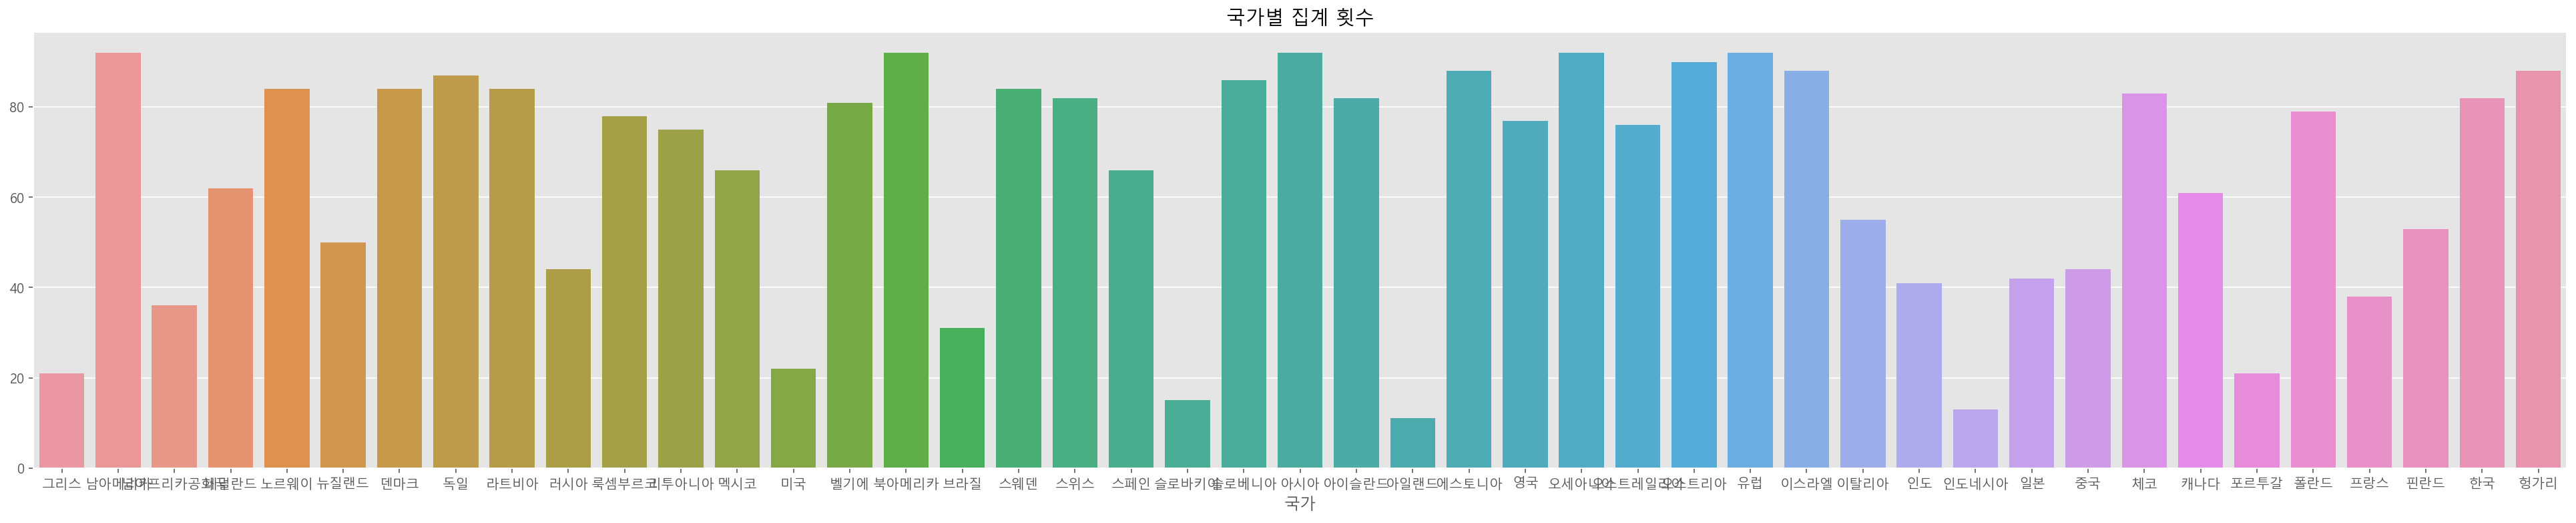

In [270]:
plt.figure(figsize=(34, 6))
sns.barplot(data=year_country, estimator=np.sum, ci=None).set_title("국가별 집계 횟수")

국가별로 집계 횟수가 다릅니다.  
최종적으로는, 모든 데이터에서 공통적으로 가지고 있는 국가들에 대한 데이터만 필요하기때문에, 이미 전처리가 된 데이터로 넘어가서 다시 분석해보겠습니다.

#### 2. 공통 국가 데이터 셋 (df_Nmw_inter)

##### 기초 기술 통계

In [271]:
# 수치 데이터 기술 통계 (describe)
df_Nmw_inter.describe()

,연도,수
count,1829.000000,1.829000e+03
mean,2009.135593,7.380114e+04
std,6.233529,1.573833e+05
min,1998.000000,1.490000e+02
25%,2004.000000,4.685000e+03
50%,2009.000000,1.710700e+04
75%,2014.000000,6.697400e+04
max,2020.000000,1.487444e+06


In [273]:
# 범주 데이터 기술 통계
df_Nmw_inter.describe(include="object")

,국가,직업
count,1829,1829
unique,28,4
top,오스트리아,의사
freq,90,501


`df_Nmw_inter`는 `df_Nmw`에서 일부 국가가 빠진 데이터이기 때문에 범주 데이터에 대한 기술 통계가 조금 다릅니다.

##### 분석과 시각화

### 3. 보건 관련/서비스 지출

### 4. 의약품 판매/소비

### 5. 공공 사회 복지 지출

## 5. 종합